In [34]:
import zipfile
import os

zip_file_path = '/content/lung_aca.zip'
unzip_directory = '/archive_final'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_directory)
except zipfile.BadZipFile:
    print("Error: The file is not a valid ZIP file.")
except FileNotFoundError:
    print(f"Error: The file at {zip_file_path} does not exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [35]:
# Define dataset path
dataset_path = '/archive_final/lung_aca'

In [61]:
import cv2
import numpy as np

# Load images from dataset directory
def load_images_from_folder(data_dir):
    images = []
    for img_name in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize to match MobileNetV2 input
            images.append(img)
    return np.array(images)

# Load dataset
X = load_images_from_folder(dataset_path)


In [62]:
# Gabor filter function
def gabor_filter(img):
    gabor_kernel = cv2.getGaborKernel((21, 21), 5, 1, 1, 1, 0, ktype=cv2.CV_32F)
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, gabor_kernel)
    return filtered_img

# Apply Gabor filtering to all images
X_filtered = np.array([gabor_filter(img) for img in X])

In [63]:
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import img_to_array

# Load MobileNetV2 model and extract features
def extract_features(image):
    model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')  # Average pooling for feature extraction
    img_array = img_to_array(image)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    features = model.predict(img_array)
    return features.flatten()

# Extract features from the dataset
X_features = np.array([extract_features(img) for img in X_filtered])

# Prepare labels based on class names or default to one class
y = np.zeros(X.shape[0])  # Use a single class (0) for all images

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 980ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 992ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 954ms/step


1/1 [==============================] - 1s 982ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 930ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 975ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 984ms/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 995ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 984ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 940ms/step


1/1 [==============================] - 1s 972ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 970ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 938ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 939ms/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 948ms/step


1/1 [==============================] - 1s 948ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 957ms/step


1/1 [==============================] - 1s 959ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 928ms/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 980ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


In [64]:
from sklearn.model_selection import train_test_split

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

In [70]:
from sklearn.ensemble import IsolationForest

def anomaly_detection(X):
    # Reshape the input data to 2D
    X_reshaped = X.reshape(X.shape[0], -1)  # Flatten the image data

    model = IsolationForest(contamination=0.1)
    model.fit(X_reshaped)  # Fit the model using the reshaped data

    # Predict anomalies
    anomalies = model.predict(X_reshaped)  # Predict using the reshaped data
    print("Anomalies detected:", anomalies)
    return anomalies

# Call the function with the original data
anomalies = anomaly_detection(X)

Anomalies detected: [ 1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1
  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


Number of anomalies detected: 10


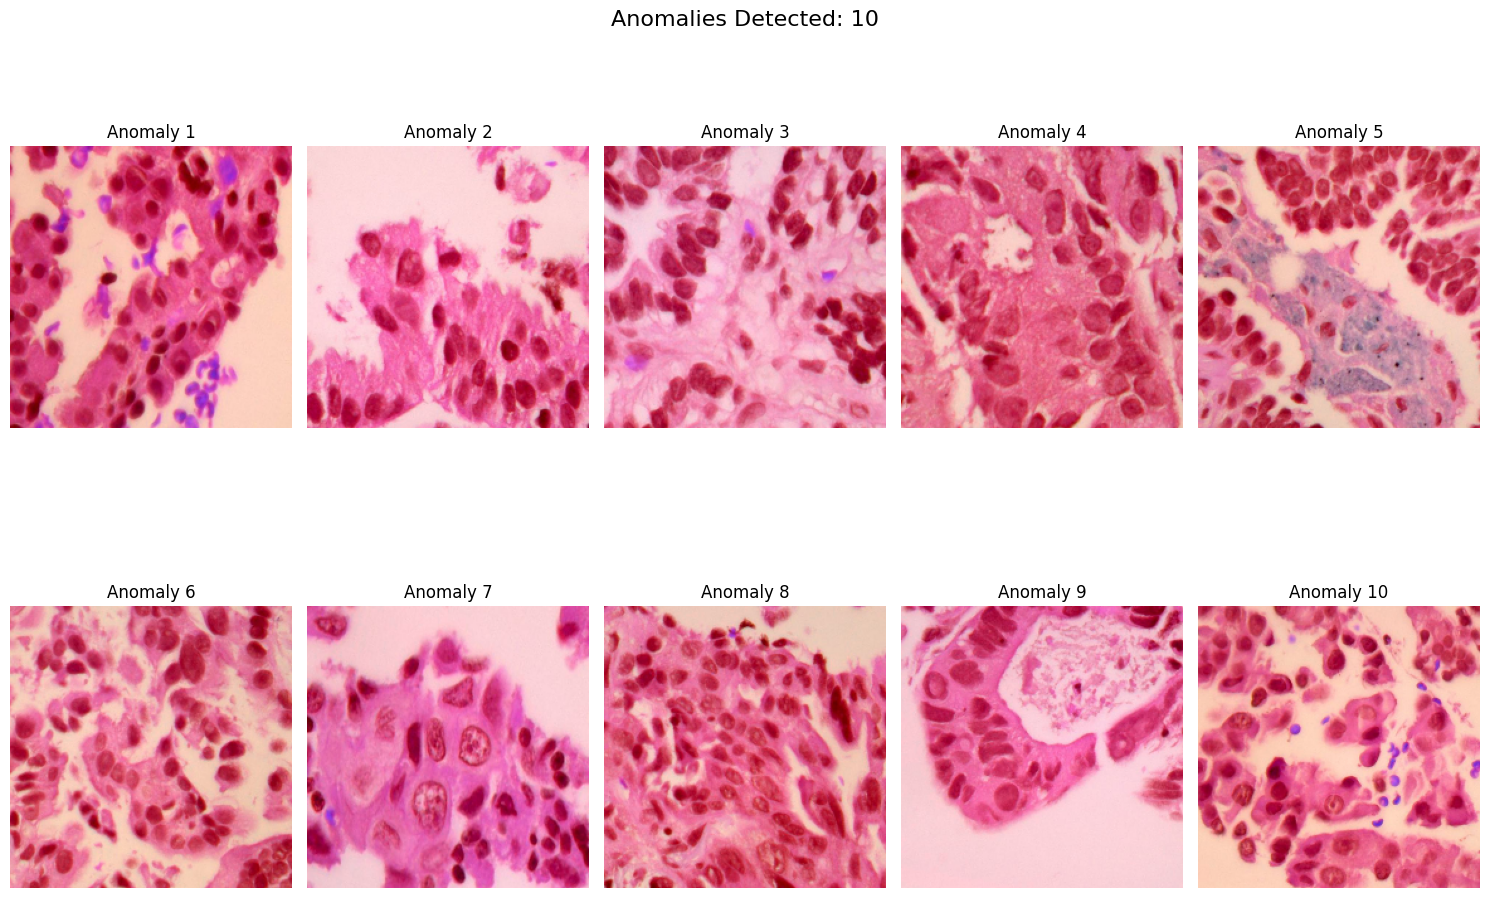

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Count anomalies
num_anomalies = np.sum(anomalies == -1)
print(f"Number of anomalies detected: {num_anomalies}")

# Visualize anomalies
def visualize_anomalies(X, anomalies):
    anomaly_indices = np.where(anomalies == -1)[0]  # Get indices of anomalies
    num_anomalies = len(anomaly_indices)

    plt.figure(figsize=(15, 15))

    for i, index in enumerate(anomaly_indices):
        plt.subplot(num_anomalies // 5 + 1, 5, i + 1)  # Adjust layout for multiple images
        plt.imshow(X[index])  # Display the anomaly image
        plt.axis('off')  # Turn off axis
        plt.title(f'Anomaly {i+1}')  # Title for each anomaly image

    plt.suptitle(f'Anomalies Detected: {num_anomalies}', fontsize=16)
    plt.tight_layout()
    plt.show()

visualize_anomalies(X, anomalies)